In [1]:
import pandas as pd

C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
dataset = pd.read_csv("file.tsv",sep="\t",names=column_names)

In [3]:
dataset

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
dataset.describe(include="all")

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [5]:
dataset.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:>

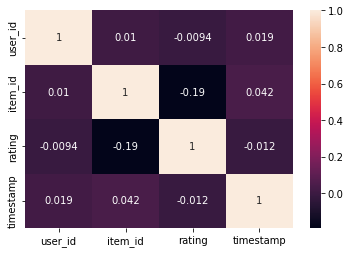

In [7]:
corr_martric = dataset.corr()
sns.heatmap(corr_martric,annot=True,linecolor="blue")

In [8]:
movie_data = pd.read_csv("Movie_Id_Titles.csv")

In [9]:
movie_data

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [10]:
movie_data.isnull().sum()

item_id    0
title      0
dtype: int64

In [11]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [12]:
data = dataset.merge(movie_data,on="item_id")

In [13]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [14]:
data.groupby("title")[["rating","timestamp"]].mean()

,rating,timestamp
title,,
'Til There Was You (1997),2.333333,8.861152e+08
1-900 (1994),2.600000,8.797260e+08
101 Dalmatians (1996),2.908257,8.829281e+08
12 Angry Men (1957),4.344000,8.828963e+08
187 (1997),3.024390,8.850084e+08
...,...,...
Young Guns II (1990),2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",3.341463,8.821438e+08
Zeus and Roxanne (1997),2.166667,8.775338e+08


In [15]:
rating = pd.DataFrame(data.groupby("title")["rating"].mean())


In [16]:
rating

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [17]:
rating["number_of_rating"]=pd.DataFrame(data.groupby("title")["rating"].count())

In [18]:
rating.sample(3)

,rating,number_of_rating
title,,
Heat (1995),3.569507,223
Akira (1988),3.380000,50
"Wizard of Oz, The (1939)",4.077236,246


# making histogram for rating and number_of_rating

In [19]:
import matplotlib.pyplot as plt

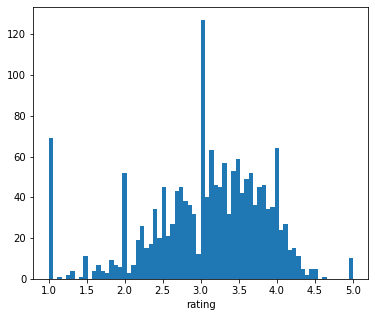

In [20]:
plt.figure(figsize=(6,5))
plt.hist(rating["rating"],bins=70)
plt.xlabel("rating")
plt.show()

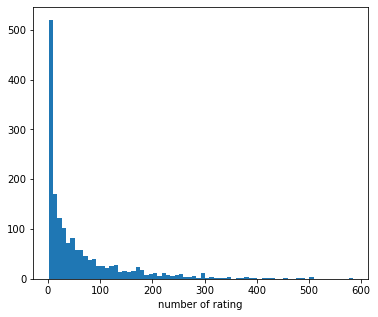

In [21]:
plt.figure(figsize=(6,5))
plt.hist(rating["number_of_rating"],bins=70)
plt.xlabel("number of rating")
plt.show()

In [22]:
data.sample(3)

,user_id,item_id,rating,timestamp,title
78559,788,627,4,880870654,Robin Hood: Prince of Thieves (1991)
86428,641,1194,3,879370299,Once Were Warriors (1994)
10494,560,423,4,879975586,E.T. the Extra-Terrestrial (1982)


In [23]:
movie_matrix = data.pivot_table(index="user_id",columns="title",values="rating")

In [24]:
movie_matrix.sample(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
312,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
movie_matrix.corr()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000e+00,-0.500000,-0.500000,0.522233,NaN,-4.264014e-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-9.819805e-01,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000e+00,-0.049890,0.269191,0.048973,0.266928,-4.340657e-02,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-4.989024e-02,1.000000,0.666667,0.256625,0.274772,1.788483e-01,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),-0.5,NaN,2.691910e-01,0.666667,1.000000,0.596644,NaN,-5.547002e-01,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,6.804138e-01,-0.361961,0.500000,0.132017,-0.518476,-1.547646e-01,NaN,-0.054554,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,8.660254e-01,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,-4.875600e-17,0.144338,0.475327,0.204926,0.623795,-3.417534e-01,NaN,0.707107,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000e+00,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,7.071068e-01,1.000000,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [26]:
movie_matrix.shape

(944, 1664)

In [27]:
# analysing correlation with similar movies
starwars_user_ratings = movie_matrix['Star Wars (1977)']
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']
  
starwars_user_ratings.sample(5)

user_id
129    NaN
314    NaN
489    NaN
642    5.0
609    NaN
Name: Star Wars (1977), dtype: float64

In [28]:
starwars_user_ratings = movie_matrix.corrwith(starwars_user_ratings)

C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
corr_starwars = pd.DataFrame(starwars_user_ratings,columns=["correlation"])
corr_starwars.dropna(inplace = True)

In [30]:
corr_starwars.sort_values("correlation",ascending=False).head()

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [31]:
rating.head(2)

,rating,number_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5


In [32]:
corr_starwars=corr_starwars.join(rating["number_of_rating"])

In [33]:
corr_starwars

,correlation,number_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [34]:
top_5_recommend = corr_starwars[corr_starwars["number_of_rating"]>100].sort_values("correlation",ascending=False).head(6)

In [36]:
top_5_recommend

,correlation,number_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
